# Ba 133

   Channel  Counts
0        0       9
1        1       0
2        2       2
3        3       0
4        4       0


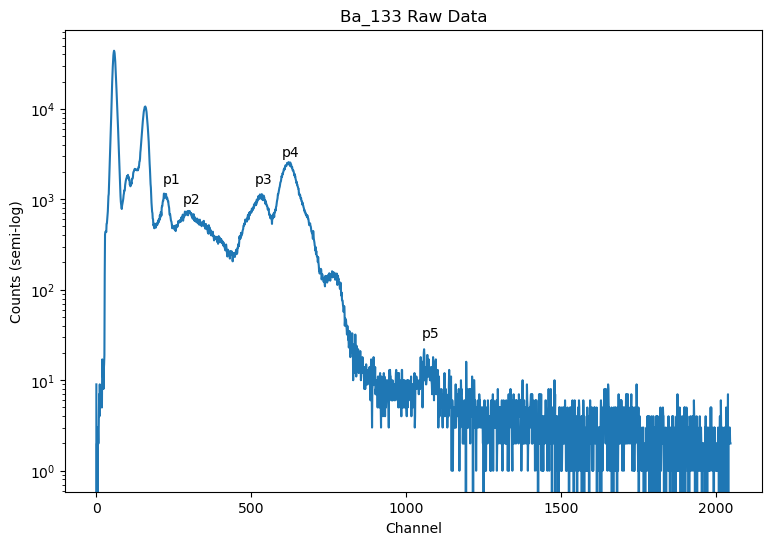

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#convert csv file to pd data frame (df), check first 10 values with df.head

Ba_133_df = pd.read_csv("Ba_133.csv")
print(Ba_133_df.head())

# label x and y df columns & make raw data plot
Ba_133_x = Ba_133_df["Channel"]
Ba_133_y = Ba_133_df["Counts"]

plt.figure(figsize=(9,6))
plt.xlabel("Channel")
plt.ylabel("Counts (semi-log)")
plt.title("Ba_133 Raw Data")

# use annotate to mark the peaks
plt.annotate( 'p1', xy=(215, 1000), xytext=(215, 1500),
            )
plt.annotate('p2', xy=(280, 800), xytext=(280, 900),
            )
plt.annotate('p3', xy=(510, 1000), xytext=(510, 1500),
            )
plt.annotate('p4', xy=(600, 2100), xytext=(600, 3000),
            )
plt.annotate('p5', xy=(1050, 30), xytext=(1050, 30),
            )

# use semi log y bc the analyzer is log based

plt.semilogy(Ba_133_x, Ba_133_y)
plt.show()


gaussian equation: G=Ae^[-(x-m)^2 / 2 * Epsilon] + C

define gaussian varibles by looking at raw data plot and guessing

A = amplitude of peak
m = mean, middle of peak on x-axis
epsilon = roughly 60% height of peak on y-axis
C = distance of start of peak from 0 on x-axis



# Gaussian

In [63]:
## need to do gaussian fit for each peak, need to define variable for each

## define gaussian function with constants names 

def gaus(x, a, m, e, c):
    fit = a*np.exp(( -(x - m)**2) / (2 * e) ) + c
    return fit

# Peak 1: 0.081 MeV

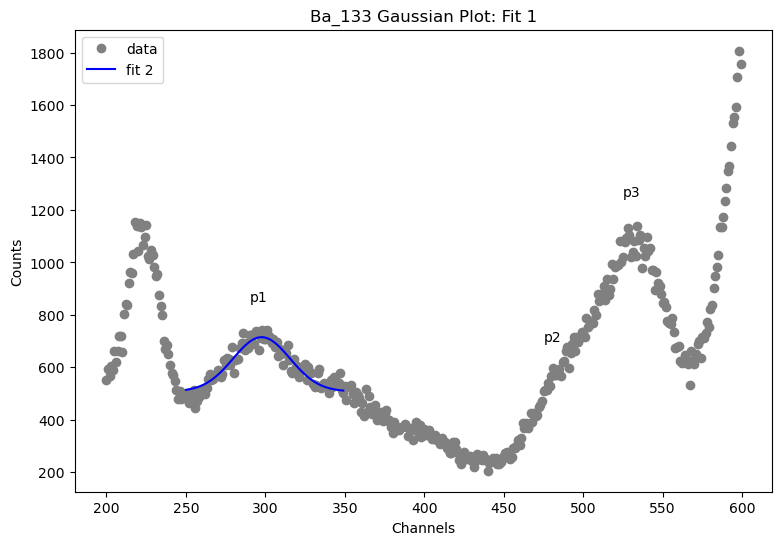

Fit 1 Amplitude:  206.831716938764 ± 8.76793472487943 
 Fit 1 Mean:  297.6006628324705 ± 0.6032397360614885 
 Fit 1 Epsilon:  320.1197644802305 ± 39.850340504656124 
 Fit 1 C:  508.2745536964295 ± 8.349006673697799


In [69]:
# define x and y value ranges
Ba_133_x_slice_1 = Ba_133_x[250:350]
Ba_133_y_slice_1 = Ba_133_y[250:350]

# define popt1 and pcov1, solve for a, m, e, and c
Ba_133_popt_1, Ba_133_pcov_1 = curve_fit( gaus, Ba_133_x_slice_1, Ba_133_y_slice_1, p0 = [a:=200, m:=300, e:=120, c:=450])

#create gaussian with fitted values
Ba_133_y_fit_1= gaus( Ba_133_x_slice_1, *Ba_133_popt_1)

##define x and y value ranges for data to make peak visible in graph
Ba_133_x_slice_data = Ba_133_x[200:600]
Ba_133_y_slice_data = Ba_133_y[200:600]

## plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Ba_133_x_slice_data, Ba_133_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Ba_133_x_slice_1, Ba_133_y_fit_1, 'b-', label='fit 2')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Ba_133 Gaussian Plot: Fit 1")
plt.legend()
plt.annotate('p1',xy=(290, 850), xytext=(290, 850)
            )
plt.annotate('p2', xy=(475,700), xytext=(475,700)
            )
plt.annotate('p3', xy=(550, 800), xytext=(525, 1250)
            )
plt.show()

# print actual fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Ba_133_pcov_1))       

print("Fit 1 Amplitude: ", Ba_133_popt_1[0], u"\u00B1" , sigma[0],
        "\n Fit 1 Mean: ", Ba_133_popt_1[1], u"\u00B1", sigma[1],
        "\n Fit 1 Epsilon: ", Ba_133_popt_1[2], u"\u00B1", sigma[2],
        "\n Fit 1 C: ", Ba_133_popt_1[3], u"\u00B1", sigma[3])

# Peak 2: 0.276 MeV

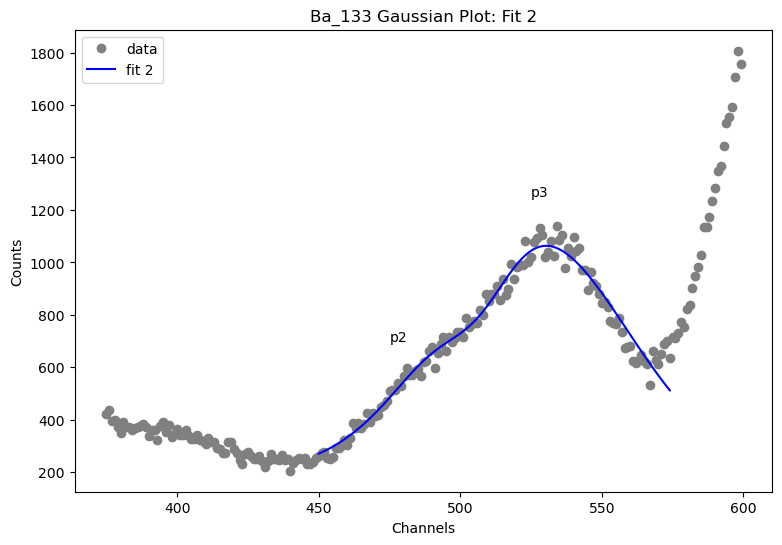

Fit 2 Amplitude:  -169.61474587243706 ± 25.274531004356913 
 Fit 2 Mean:  506.9831389809982 ± 1.41633987256634 
 Fit 2 Epsilon:  11.57981472544761 ± 1.7408658988236936 
 Fit 2 C:  200.53185843842283 ± 32.454680645113996


In [70]:
# define double gaussian
def n_gaus(x, a1, a2, m1, m2, e1, e2, c):
    fit = (a1*np.exp(( -(x - m1)**2) / (2 * e1**2) )) + (a2*np.exp(( -(x - m2)**2) / (2 * e2**2) )) + c
    return fit

# define x and y value ranges
Ba_133_x_slice_2 = Ba_133_x[450:575]
Ba_133_y_slice_2 = Ba_133_y[450:575]

# define popt2 and pcov2, solve for a1, a2, m1, m2, e1, e2, and c 
# gaus 1 = p2, gaus 2 = p3
Ba_133_popt_2, Ba_133_pcov_2 = curve_fit( n_gaus, Ba_133_x_slice_2, Ba_133_y_slice_2, 
                                         p0=[a1:=750, a2:=1000, m1:=490, m2:=505, e1:=10, e2:=50, c:=200])

#create gaussian with fitted values
Ba_133_y_fit_2= n_gaus( Ba_133_x_slice_2, *Ba_133_popt_2)

##define x and y value ranges for data to make peak visible in graph
Ba_133_x_slice_data = Ba_133_x[375:600]
Ba_133_y_slice_data = Ba_133_y[375:600]

## plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Ba_133_x_slice_data, Ba_133_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Ba_133_x_slice_2, Ba_133_y_fit_2, 'b-', label='fit 2')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Ba_133 Gaussian Plot: Fit 2")
plt.legend()
plt.annotate('p1',xy=(290, 850), xytext=(290, 850)
            )
plt.annotate('p2', xy=(475,700), xytext=(475,700)
            )
plt.annotate('p3', xy=(550, 800), xytext=(525, 1250)
            )
plt.show()

# print actual fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Ba_133_pcov_2))       

print("Fit 2 Amplitude: ", Ba_133_popt_2[0], u"\u00B1" , sigma[0],
        "\n Fit 2 Mean: ", Ba_133_popt_2[2], u"\u00B1", sigma[2],
        "\n Fit 2 Epsilon: ", Ba_133_popt_2[4], u"\u00B1", sigma[4],
        "\n Fit 2 C: ", Ba_133_popt_2[6], u"\u00B1", sigma[6])

# Peak 3: 0.303 MeV

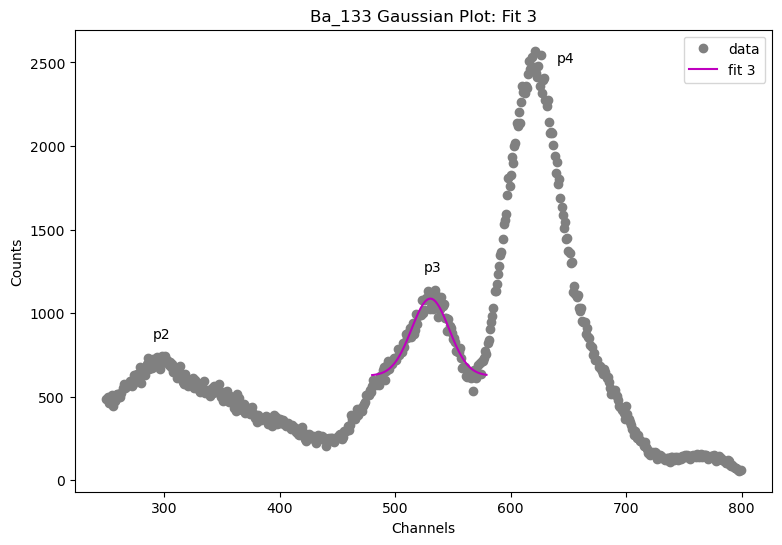

Fit 3 Amplitude:  461.1729046257683 ± 14.080765969200977 
 Fit 3 Mean:  530.3850014121278 ± 0.44804060611900703 
 Fit 3 Epsilon:  263.7022031080031 ± 23.53173589069603 
 Fit 3 C:  625.5251852556514 ± 11.932501140564797


In [71]:
# define x and y value ranges
Ba_133_x_slice_3 = Ba_133_x[480:580]
Ba_133_y_slice_3 = Ba_133_y[480:580]

# define popt3 and pcov3, solve for a3, m3, e3, and c3
Ba_133_popt_3, Ba_133_pcov_3 = curve_fit( gaus, Ba_133_x_slice_3, Ba_133_y_slice_3, p0 = [a3:=500, m3:=540, e3:=260, c3:=750])

#create gaussian with fitted values
Ba_133_y_fit_3= gaus( Ba_133_x_slice_3, *Ba_133_popt_3)

##define x and y value ranges for data to make peak visible in graph
Ba_133_x_slice_data = Ba_133_x[250:800]
Ba_133_y_slice_data = Ba_133_y[250:800]

## plot all peaks in fit curve
plt.figure(figsize=(9,6))
plt.plot(Ba_133_x_slice_data, Ba_133_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Ba_133_x_slice_3, Ba_133_y_fit_3, 'm-', label='fit 3')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Ba_133 Gaussian Plot: Fit 3")
plt.legend()
plt.annotate('p2', xy=(280, 800), xytext=(290, 850),
            )
plt.annotate('p3', xy=(550, 800), xytext=(525, 1250),
            )
plt.annotate('p4', xy=(650, 2100), xytext=(640, 2500),
            )
plt.show()

# print actual fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Ba_133_pcov_3))       

print("Fit 3 Amplitude: ", Ba_133_popt_3[0], u"\u00B1" , sigma[0],
        "\n Fit 3 Mean: ", Ba_133_popt_3[1], u"\u00B1", sigma[1],
        "\n Fit 3 Epsilon: ", Ba_133_popt_3[2], u"\u00B1", sigma[2],
        "\n Fit 3 C: ", Ba_133_popt_3[3], u"\u00B1", sigma[3])

# Peak 4: 0.356 MeV

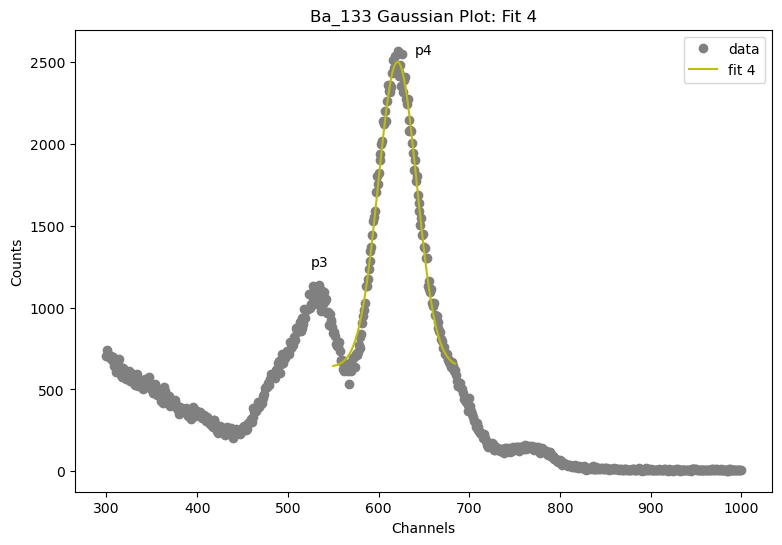

Fit 4 Amplitude:  1864.8541633575614 ± 17.6531348722185 
 Fit 4 Mean:  620.8060465800778 ± 0.18720446476158387 
 Fit 4 Epsilon:  444.75655621784955 ± 12.139336351373082 
 Fit 4 C:  636.6763097974012 ± 14.133036503733456


In [74]:
# define x and y value ranges
Ba_133_x_slice_4 = Ba_133_x[550:685]
Ba_133_y_slice_4 = Ba_133_y[550:685]

# define popt4 and pcov4, solve for a3, m3, e3, and c3
Ba_133_popt_4, Ba_133_pcov_4 = curve_fit( gaus, Ba_133_x_slice_4, Ba_133_y_slice_4, 
                                         p0 = [a1:=2000, m1:=620, e1:=1100, c:=500])

#create gaussian with fitted values
Ba_133_y_fit_4= gaus( Ba_133_x_slice_4, *Ba_133_popt_4)

##define x and y value ranges for data to make peak visible in graph
Ba_133_x_slice_data = Ba_133_x[300:1000]
Ba_133_y_slice_data = Ba_133_y[300:1000]

## plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Ba_133_x_slice_data, Ba_133_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Ba_133_x_slice_4, Ba_133_y_fit_4, 'y-', label='fit 4')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Ba_133 Gaussian Plot: Fit 4")
plt.legend()
plt.annotate('p3', xy=(550, 800), xytext=(525, 1250),
            )
plt.annotate('p4', xy=(650, 2100), xytext=(640, 2550),
            )
plt.show()

# print actual fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Ba_133_pcov_4))       

print("Fit 4 Amplitude: ", Ba_133_popt_4[0], u"\u00B1" , sigma[0],
        "\n Fit 4 Mean: ", Ba_133_popt_4[1], u"\u00B1", sigma[1],
        "\n Fit 4 Epsilon: ", Ba_133_popt_4[2], u"\u00B1", sigma[2],
        "\n Fit 4 C: ", Ba_133_popt_4[3], u"\u00B1", sigma[3])

# Peak 5: 0.384 MeV

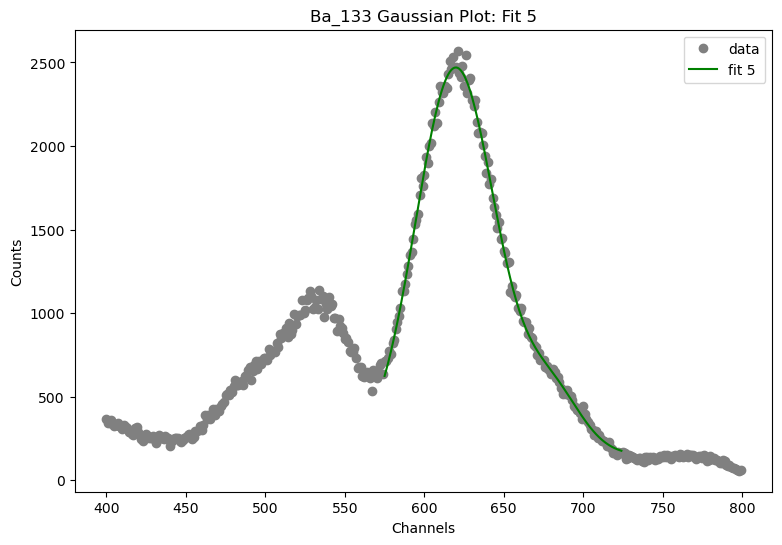

Fit 5 Amplitude:  372.54588056582116 ± 16.17019042046247 
 Fit 5 Mean:  679.4661772583805 ± 1.0081419263860742 
 Fit 5 Epsilon:  18.84644542738459 ± 1.0483660839676572 
 Fit 5 C:  153.20457836944797 ± 17.91671594507912


In [102]:
# define double gaussian
def n_gaus(x, a1, m1, e1, a2, m2, e2, c):
    fit = (a1*np.exp((-(x - m1)**2)/(2 * e1**2))) + (a2*np.exp((-(x - m2)**2)/(2 * e2**2))) + c
    return fit

# define x and y value ranges
Ba_133_x_slice_5 = Ba_133_x[575:725]
Ba_133_y_slice_5 = Ba_133_y[575:725]

# define popt5 and pcov5, solve for a1, a2, m1, m2, e1, e1, and c
# gaus 1 = p4, gaus 2 = p5
Ba_133_popt_5, Ba_133_pcov_5 = curve_fit( n_gaus, Ba_133_x_slice_5, Ba_133_y_slice_5, 
                                         p0 = [a1:=2500, m1:=620, e1:=25, a2:=750, m2:=680, e2:=1, c:=100])

#create gaussian with fitted values
Ba_133_y_fit_5= n_gaus( Ba_133_x_slice_5, *Ba_133_popt_5)

#define x and y value ranges for data to make peak visible in graph
Ba_133_x_slice_data = Ba_133_x[400:800]
Ba_133_y_slice_data = Ba_133_y[400:800]

## plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Ba_133_x_slice_data, Ba_133_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Ba_133_x_slice_5, Ba_133_y_fit_5, 'g-', label='fit 5')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Ba_133 Gaussian Plot: Fit 5")
plt.legend()

plt.show()

# print actual fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Ba_133_pcov_5))       

print("Fit 5 Amplitude: ", Ba_133_popt_5[3], u"\u00B1" , sigma[3],
        "\n Fit 5 Mean: ", Ba_133_popt_5[4], u"\u00B1", sigma[4],
        "\n Fit 5 Epsilon: ", Ba_133_popt_5[5], u"\u00B1", sigma[5],
        "\n Fit 5 C: ", Ba_133_popt_5[6], u"\u00B1", sigma[6])

Channels = 581, 620, 506, 469, 196